In [13]:
# 网页访问（Requests库），将网页保存下来,保存到response.txt
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'http://guba.eastmoney.com/list,hk00700,1,f.html'#开发者工具获取url
response = requests.get(url)
response#Response [200] 2开头表示访问正常
with open('response.txt', 'w', encoding='utf-8') as f:
    f.write(response.content.decode('utf-8'))

In [16]:
# import requests
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 定义爬取的页面链接和页码
url_template = 'http://guba.eastmoney.com/list,hk00700,1,f_{}.html'
pages = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # 需要爬取的页码

# 定义存储结果的空 DataFrame
df = pd.DataFrame(columns=['read', 'reply', 'title', 'author', 'update'])

In [17]:
# 循环遍历每个页码，依次爬取内容并存储到 DataFrame 中
# 首先，使用lxml解析器解析HTML内容，
# 然后使用BeautifulSoup来查找目标元素，提取其中的文本内容。
for page in pages:
    url = url_template.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    article_list = soup.find('div', id='articlelistnew')
    articles = article_list.find_all('div', class_='articleh normal_post')
    for article in articles:
        read = article.find('span', class_='l1 a1').text
        reply = article.find('span', class_='l2 a2').text
        title = article.find('span', class_='l3 a3').text.strip()
        author = article.find('span', class_='l4 a4').text.strip()
        update = article.find('span', class_='l5 a5').text
        df = df.append({'read': read, 'reply': reply, 'title': title, 'author': author, 'update': update},
                       ignore_index=True)

In [18]:
df

,read,reply,title,author,update
0,276,0,22家港股公司回购 腾讯控股回购3.50亿港元,腾讯控股资讯,05-23 09:30
1,1083,1,港股策略 | 短期利空出尽 或迎阶段性反弹拐点,腾讯控股资讯,05-23 07:57
2,1007,5,微信刷掌支付试水交通场景应用 专家认为生物识别是支,腾讯控股资讯,05-23 01:11
3,80839,180,国家新闻出版署发布5月国产网络游戏审批信息,腾讯控股资讯,05-22 20:18
4,4600,29,腾讯控股：耗资3.5亿港元回购103万股公司股份,腾讯控股资讯,05-22 18:28
5,860,2,微信刷掌支付发布！出门不用带手机、抬手就能完成支付,腾讯控股资讯,05-22 18:20
6,5172,26,腾讯控股：耗资约3.5亿港元回购103万股,腾讯控股资讯,05-22 18:16
7,734,1,南向资金今日净卖出21.62亿港元 净买入腾讯控股8.25亿,腾讯控股资讯,05-22 17:40
8,2923,10,空手能付款！微信官宣新功能：刷掌支付来了,腾讯控股资讯,05-22 12:17
9,1863,2,机构：港股估值吸引力升高 龙头平台估值性价比凸显（,腾讯控股资讯,05-22 07:48


In [19]:
# 将 DataFrame 存储到 Excel 文件中
df.to_excel('results.xlsx', index=False)

In [20]:
# 情感分析
# 读取数据
import pandas as pd
df =pd.read_excel('results.xlsx')
df

,read,reply,title,author,update
0,276,0,22家港股公司回购 腾讯控股回购3.50亿港元,腾讯控股资讯,05-23 09:30
1,1083,1,港股策略 | 短期利空出尽 或迎阶段性反弹拐点,腾讯控股资讯,05-23 07:57
2,1007,5,微信刷掌支付试水交通场景应用 专家认为生物识别是支,腾讯控股资讯,05-23 01:11
3,80839,180,国家新闻出版署发布5月国产网络游戏审批信息,腾讯控股资讯,05-22 20:18
4,4600,29,腾讯控股：耗资3.5亿港元回购103万股公司股份,腾讯控股资讯,05-22 18:28
5,860,2,微信刷掌支付发布！出门不用带手机、抬手就能完成支付,腾讯控股资讯,05-22 18:20
6,5172,26,腾讯控股：耗资约3.5亿港元回购103万股,腾讯控股资讯,05-22 18:16
7,734,1,南向资金今日净卖出21.62亿港元 净买入腾讯控股8.25亿,腾讯控股资讯,05-22 17:40
8,2923,10,空手能付款！微信官宣新功能：刷掌支付来了,腾讯控股资讯,05-22 12:17
9,1863,2,机构：港股估值吸引力升高 龙头平台估值性价比凸显（,腾讯控股资讯,05-22 07:48


In [23]:
# !pip install snownlp
#使用SnowNLP计算对每个帖子标题的文字评估情绪得分
import snownlp
from snownlp import SnowNLP

def senti(text):
    s = SnowNLP(text)
    return s.sentiments

df['情绪']=df['title'].apply(senti)
df.to_excel('情感.xlsx')

In [24]:
df

,read,reply,title,author,update,情绪
0,276,0,22家港股公司回购 腾讯控股回购3.50亿港元,腾讯控股资讯,05-23 09:30,0.136698
1,1083,1,港股策略 | 短期利空出尽 或迎阶段性反弹拐点,腾讯控股资讯,05-23 07:57,0.992806
2,1007,5,微信刷掌支付试水交通场景应用 专家认为生物识别是支,腾讯控股资讯,05-23 01:11,0.984616
3,80839,180,国家新闻出版署发布5月国产网络游戏审批信息,腾讯控股资讯,05-22 20:18,0.813330
4,4600,29,腾讯控股：耗资3.5亿港元回购103万股公司股份,腾讯控股资讯,05-22 18:28,0.518142
5,860,2,微信刷掌支付发布！出门不用带手机、抬手就能完成支付,腾讯控股资讯,05-22 18:20,0.045132
6,5172,26,腾讯控股：耗资约3.5亿港元回购103万股,腾讯控股资讯,05-22 18:16,0.194522
7,734,1,南向资金今日净卖出21.62亿港元 净买入腾讯控股8.25亿,腾讯控股资讯,05-22 17:40,0.997660
8,2923,10,空手能付款！微信官宣新功能：刷掌支付来了,腾讯控股资讯,05-22 12:17,0.106190
9,1863,2,机构：港股估值吸引力升高 龙头平台估值性价比凸显（,腾讯控股资讯,05-22 07:48,0.560248


In [28]:
# 对情绪列进行涨跌判断
df['情绪涨跌'] = df['情绪'].apply(lambda x: '涨' if x > 0.5 else '跌')
df

,read,reply,title,author,update,情绪,情绪涨跌
0,276,0,22家港股公司回购 腾讯控股回购3.50亿港元,腾讯控股资讯,05-23 09:30,0.136698,跌
1,1083,1,港股策略 | 短期利空出尽 或迎阶段性反弹拐点,腾讯控股资讯,05-23 07:57,0.992806,涨
2,1007,5,微信刷掌支付试水交通场景应用 专家认为生物识别是支,腾讯控股资讯,05-23 01:11,0.984616,涨
3,80839,180,国家新闻出版署发布5月国产网络游戏审批信息,腾讯控股资讯,05-22 20:18,0.813330,涨
4,4600,29,腾讯控股：耗资3.5亿港元回购103万股公司股份,腾讯控股资讯,05-22 18:28,0.518142,涨
5,860,2,微信刷掌支付发布！出门不用带手机、抬手就能完成支付,腾讯控股资讯,05-22 18:20,0.045132,跌
6,5172,26,腾讯控股：耗资约3.5亿港元回购103万股,腾讯控股资讯,05-22 18:16,0.194522,跌
7,734,1,南向资金今日净卖出21.62亿港元 净买入腾讯控股8.25亿,腾讯控股资讯,05-22 17:40,0.997660,涨
8,2923,10,空手能付款！微信官宣新功能：刷掌支付来了,腾讯控股资讯,05-22 12:17,0.106190,跌
9,1863,2,机构：港股估值吸引力升高 龙头平台估值性价比凸显（,腾讯控股资讯,05-22 07:48,0.560248,涨


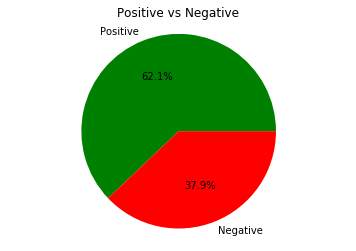

In [29]:
# 统计分析比例
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件并提取需要的列
data =pd.read_excel('情感.xlsx')
column_to_check = '情绪'
column_data = data[column_to_check]

# 计算大于0.5和小于0.5的数量（>0.5为积极，小于0.5为消极）
positive_count = sum(column_data >= 0.5)
negative_count = sum(column_data < 0.5)

# 绘制饼图
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Positive vs Negative')
plt.show()